In [1]:
# -*- coding: utf-8 -*-
"""cnn_mnist_0_9.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1aq49uaQRCfAi4Q_UTP2kNfP1Dr81Az4i
"""
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

# 下載MNIST數據集
mnist_file = get_file('mnist.npz', origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')
mnist = np.load(mnist_file)

# 數據預處理
train_images, train_labels = mnist['x_train'], mnist['y_train']
test_images, test_labels = mnist['x_test'], mnist['y_test']

# Const
data_len = 28
data_wid = 28
input_size = data_len * data_wid
output_size = 10
initial = 5
enternal = 11
input_layer = int(pow(2,initial))

# 數據預處理
train_images = train_images.reshape((-1, input_size)) / 255.0
test_images = test_images.reshape((-1, input_size)) / 255.0

# one-hot encoding
train_labels = to_categorical(train_labels, num_classes=output_size)
test_labels = to_categorical(test_labels, num_classes=output_size)

# 構建CNN模型

input_shape = (data_len, data_wid, 1)
model = models.Sequential()
model.add(Dense(input_layer, activation='relu', input_dim=input_size))
for i in range(initial+1, enternal):
  for j in range(3):
    model.add(Dense(int(pow(2,i)),activation='relu'))
model.add(Dense(output_size, activation='softmax'))

model.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,533,162 (13.48 MB)

 Trainable params: 3,533,162 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 63s 187ms/step - accuracy: 0.5137 - loss: 1.2652 - val_accuracy: 0.8989 - val_loss: 0.3621
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 69s 144ms/step - accuracy: 0.9050 - loss: 0.3466 - val_accuracy: 0.9454 - val_loss: 0.2108
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.9409 - loss: 0.2234 - val_accuracy: 0.9509 - val_loss: 0.1907
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.9520 - loss: 0.1823 - val_accuracy: 0.9547 - val_loss: 0.1815
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.9594 - loss: 0.1609 - val_accuracy: 0.9582 - val_loss: 0.1703
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.9653 - loss: 0.1340 - val_accuracy: 0.9529 - val_loss: 0.2124
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.9631 - loss: 0.1428 - val_accuracy: 0.9620 - val_loss: 0.1597
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.9695 - loss: 0

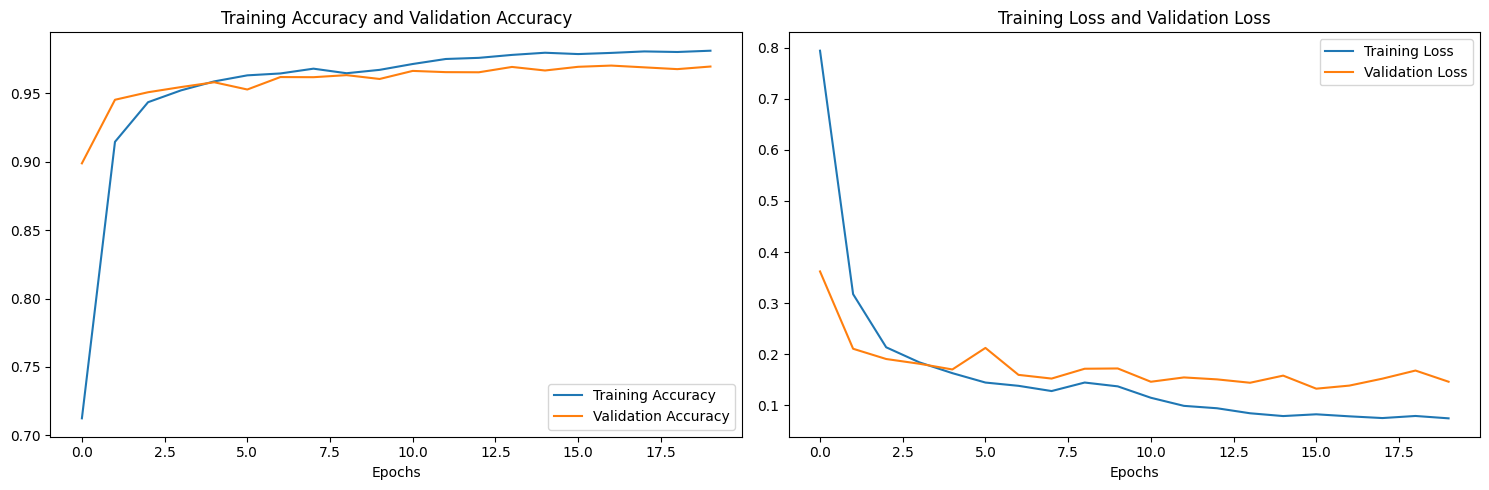

In [2]:
# TODO 訓練模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=200)

# 創建一個具有兩個子圖的圖形
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 第一個子圖 - 訓練的損失和準確率變化
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_title('Training Accuracy and Validation Accuracy')
axes[0].legend()

# 第二個子圖 - 驗證的損失和準確率變化
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_title('Training Loss and Validation Loss')
axes[1].legend()

# 設置兩個子圖之間的間距
plt.tight_layout()

# 顯示圖形
plt.show()